<a href="https://colab.research.google.com/github/mrigankapaul-dhubri/Mriganka-Covid-EDA/blob/main/EDA_and_Visualization_Covid_19_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis and Visualization on the Covid 19 cases in the period of Januay 2020 and Aug 2021 for all the countries that comes under WHO Regions**



We got the dataset from the link given below-
url- https://data.humdata.org/dataset/coronavirus-covid-19-cases-and-deaths

Initially we imported the dataset in MS SQL Server to group the data on monthly basis for all the countries and the region. Also we didnot select a few columns which will not be required for us. Below is the sql query for extracting the data-


*SELECT DATEPART(YYYY, Date_reported) YEAR_OF_CASES, MONTH(Date_reported) MONTH_OF_CASES, country_code COUNTRY_CODE, country COUNTRY,
WHO_region WHO_REGION, SUM(New_cases) NEW_CASES, SUM(New_deaths) NEW_DEATHS
FROM who_covid
group by DATEPART(YYYY, Date_reported), MONTH(Date_reported), WHO_region, Country_code, Country
ORDER BY WHO_REGION, Country_code, DATEPART(YYYY, Date_reported), MONTH(Date_reported)*

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving covid-19_sts_project.csv to covid-19_sts_project.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("covid-19_sts_project.csv")
df.head()

,YEAR_OF_CASES,MONTH_OF_CASES,COUNTRY_CODE,COUNTRY,WHO_REGION,NEW_CASES,NEW_DEATHS
0,2020,1,AO,Angola,AFRO,0,0
1,2020,2,AO,Angola,AFRO,0,0
2,2020,3,AO,Angola,AFRO,7,1
3,2020,4,AO,Angola,AFRO,20,1
4,2020,5,AO,Angola,AFRO,57,2


In [ ]:
df.tail()

,YEAR_OF_CASES,MONTH_OF_CASES,COUNTRY_CODE,COUNTRY,WHO_REGION,NEW_CASES,NEW_DEATHS
4735,2021,4,WS,Samoa,WPRO,0,0
4736,2021,5,WS,Samoa,WPRO,0,0
4737,2021,6,WS,Samoa,WPRO,0,0
4738,2021,7,WS,Samoa,WPRO,0,0
4739,2021,8,WS,Samoa,WPRO,0,0


In [ ]:
df.columns

Index(['YEAR_OF_CASES', 'MONTH_OF_CASES', 'COUNTRY_CODE', 'COUNTRY',
       'WHO_REGION', 'NEW_CASES', 'NEW_DEATHS'],
      dtype='object')

In [ ]:
df.shape

(4740, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4740 entries, 0 to 4739
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   YEAR_OF_CASES   4740 non-null   int64 
 1   MONTH_OF_CASES  4740 non-null   int64 
 2   COUNTRY_CODE    4720 non-null   object
 3   COUNTRY         4740 non-null   object
 4   WHO_REGION      4740 non-null   object
 5   NEW_CASES       4740 non-null   int64 
 6   NEW_DEATHS      4740 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 259.3+ KB


In [ ]:
df[['YEAR_OF_CASES','MONTH_OF_CASES']] = df[['YEAR_OF_CASES', 'MONTH_OF_CASES']].astype('object')

In [ ]:
df.drop(['COUNTRY_CODE'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4740 entries, 0 to 4739
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   YEAR_OF_CASES   4740 non-null   object
 1   MONTH_OF_CASES  4740 non-null   object
 2   COUNTRY         4740 non-null   object
 3   WHO_REGION      4740 non-null   object
 4   NEW_CASES       4740 non-null   int64 
 5   NEW_DEATHS      4740 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 222.3+ KB


In [ ]:
df.describe()

,NEW_CASES,NEW_DEATHS
count,4.740000e+03,4740.000000
mean,4.509550e+04,940.797679
std,2.742954e+05,4784.742821
min,-1.404100e+04,-13.000000
25%,9.000000e+00,0.000000
50%,6.485000e+02,7.000000
75%,1.160950e+04,170.000000
max,9.284558e+06,120770.000000


In [ ]:
df['NEW_CASES'].mean()

45095.49831223629

In [ ]:
df['NEW_CASES'].median()

648.5

# Univariate Analysis

In [ ]:
df['YEAR_OF_CASES'].isnull().sum()

0

In [ ]:
df['YEAR_OF_CASES'].nunique()

2

In [ ]:
df['YEAR_OF_CASES'].unique()

array([2020, 2021], dtype=object)

In [ ]:
df['YEAR_OF_CASES'].value_counts()

2020    2844
2021    1896
Name: YEAR_OF_CASES, dtype: int64

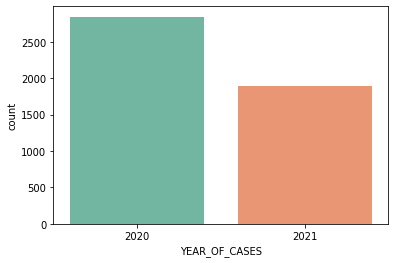

In [ ]:
df_year_of_cases = sns.countplot(x = 'YEAR_OF_CASES', data = df, palette="Set2")
plt.show()

In [ ]:
df['MONTH_OF_CASES'].isnull().sum()

0

In [ ]:
df['MONTH_OF_CASES'].nunique()

12

In [ ]:
df['MONTH_OF_CASES'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype=object)

In [ ]:
df.groupby(['YEAR_OF_CASES','MONTH_OF_CASES']).count()

COUNTRY  WHO_REGION  NEW_CASES  NEW_DEATHS
YEAR_OF_CASES MONTH_OF_CASES                                            
2020          1                   237         237        237         237
              2                   237         237        237         237
              3                   237         237        237         237
              4                   237         237        237         237
              5                   237         237        237         237
              6                   237         237        237         237
              7                   237         237        237         237
              8                   237         237        237         237
              9                   237         237        237         237
              10                  237         237        237         237
              11                  237         237        237         237
              12                  237         237        237         237
2021          1                   237         237        237         237
              2                   237         237        237         237
              3                   237         237        237         237
              4                   237         237        237         237
              5                   237         237        237         237
              6                   237         237        237         237
              7                   237         237        237         237
              8                   237         237        237         237

In [ ]:
df['COUNTRY'].isnull().sum()

0

In [ ]:
df['COUNTRY'].nunique()

237

In [ ]:
df['WHO_REGION'].nunique()

7

In [ ]:
df['WHO_REGION'].unique()

array(['AFRO', 'AMRO', 'EMRO', 'EURO', 'Other', 'SEARO', 'WPRO'],
      dtype=object)

In [ ]:
df['WHO_REGION'].value_counts()

EURO     1240
AMRO     1120
AFRO     1000
WPRO      700
EMRO      440
SEARO     220
Other      20
Name: WHO_REGION, dtype: int64

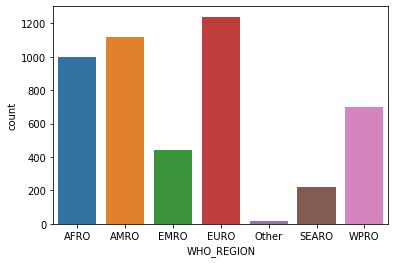

In [ ]:
df_count_region =  sns.countplot(x = 'WHO_REGION', data = df)
plt.show()

In [ ]:
df['NEW_CASES'].sum()

213752662

In [ ]:
df['NEW_DEATHS'].sum()

4459381

In [ ]:
df['NEW_CASES'].isnull().sum()

0

In [ ]:
df['NEW_DEATHS'].isnull().sum()

0

#Multivariate Analysis

In [ ]:
df1 = df.groupby('WHO_REGION', as_index = False).sum()
df1

,WHO_REGION,NEW_CASES,NEW_DEATHS
0,AFRO,5542072,132606
1,AMRO,82586809,2083259
2,EMRO,14315366,261090
3,EURO,64334138,1261817
4,Other,764,13
5,SEARO,40828589,635278
6,WPRO,6144924,85318


In [ ]:
import plotly.express as px
fig = px.bar(df1, x='WHO_REGION', y='NEW_CASES')
fig.show()

In [ ]:
fig = px.bar(df1, x='WHO_REGION', y='NEW_DEATHS')
fig.show()

In [ ]:
df2 = df.loc[df['WHO_REGION'] == 'AFRO']
df2 = df2.groupby('COUNTRY', as_index = False).sum()
print(df2)
fig = px.bar(df2, x='COUNTRY', y='NEW_CASES')
fig.show()

                             COUNTRY  NEW_CASES  NEW_DEATHS
0                            Algeria     193171        5096
1                             Angola      46539        1176
2                              Benin      12492         127
3                           Botswana     150842        2171
4                       Burkina Faso      13737         171
5                            Burundi      11818          10
6                         Cabo Verde      34919         308
7                           Cameroon      83425        1350
8           Central African Republic      11270          99
9                               Chad       4987         174
10                           Comoros       4055         147
11                             Congo      13533         183
12                     Côte d’Ivoire      54038         413
13  Democratic Republic of the Congo      54226        1057
14                 Equatorial Guinea       9173         123
15                           Eritrea    

In [ ]:
df2 = df.loc[df['WHO_REGION'] == 'AFRO']
df2 = df2.groupby('COUNTRY', as_index = False).sum()
fig = px.bar(df2, x='COUNTRY', y='NEW_DEATHS')
fig.show()

In [ ]:
df2 = df.loc[df['WHO_REGION'] == 'AMRO']
df2 = df2.groupby('COUNTRY', as_index = False).sum()
print(df2)
fig = px.bar(df2, x='COUNTRY', y='NEW_CASES')
fig.show()

                               COUNTRY  NEW_CASES  NEW_DEATHS
0                             Anguilla        174           0
1                  Antigua and Barbuda       1540          43
2                            Argentina    5148085      110806
3                                Aruba      14153         128
4                              Bahamas      17615         343
5                             Barbados       4694          48
6                               Belize      15683         355
7                              Bermuda       2792          33
8     Bolivia (Plurinational State of)     487721       18330
9                              Bonaire       1745          17
10                              Brazil   20614866      575742
11              British Virgin Islands       2568          37
12                              Canada    1476149       26849
13                      Cayman Islands        669           2
14                               Chile    1635173       36718
15      

In [ ]:
df2 = df.loc[df['WHO_REGION'] == 'AMRO']
df2 = df2.groupby('COUNTRY', as_index = False).sum()
fig = px.bar(df2, x='COUNTRY', y='NEW_DEATHS')
fig.show()

In [ ]:
df2 = df.loc[df['WHO_REGION'] == 'EMRO']
df2 = df2.groupby('COUNTRY', as_index = False).sum()
print(df2)
fig = px.bar(df2, x='COUNTRY', y='NEW_CASES')
fig.show()

                                              COUNTRY  NEW_CASES  NEW_DEATHS
0                                         Afghanistan     152822        7093
1                                             Bahrain     271933        1388
2                                            Djibouti      11707         157
3                                               Egypt     286938       16691
4                          Iran (Islamic Republic of)    4796377      104022
5                                                Iraq    1847697       20410
6                                              Jordan     792278       10338
7                                              Kuwait     408797        2412
8                                             Lebanon     595522        8024
9                                               Libya     300455        4126
10                                            Morocco     829137       12079
11                                               Oman     301683        4047

In [ ]:
df2 = df.loc[df['WHO_REGION'] == 'EMRO']
df2 = df2.groupby('COUNTRY', as_index = False).sum()
fig = px.bar(df2, x='COUNTRY', y='NEW_DEATHS')
fig.show()

In [ ]:
df2 = df.loc[df['WHO_REGION'] == 'EURO']
df2 = df2.groupby('COUNTRY', as_index = False).sum()
print(df2)
fig = px.bar(df2, x='COUNTRY', y='NEW_CASES')
fig.show()

               COUNTRY  NEW_CASES  NEW_DEATHS
0              Albania     141365        2483
1              Andorra      15014         130
2              Armenia     239739        4785
3              Austria     675741       10573
4           Azerbaijan     401828        5403
..                 ...        ...         ...
57  The United Kingdom    6590751      132003
58              Turkey    6273681       55212
59        Turkmenistan          0           0
60             Ukraine    2278171       53566
61          Uzbekistan     152363        1050

[62 rows x 3 columns]


In [ ]:
df2 = df.loc[df['WHO_REGION'] == 'EURO']
df2 = df2.groupby('COUNTRY', as_index = False).sum()
fig = px.bar(df2, x='COUNTRY', y='NEW_DEATHS')
fig.show()

In [ ]:
df2 = df.loc[df['WHO_REGION'] == 'Other']
df2 = df2.groupby('COUNTRY', as_index = False).sum()
print(df2)
fig = px.bar(df2, x='COUNTRY', y='NEW_CASES')
fig.show()

  COUNTRY  NEW_CASES  NEW_DEATHS
0   Other        764          13


In [ ]:
df2 = df.loc[df['WHO_REGION'] == 'Other']
df2 = df2.groupby('COUNTRY', as_index = False).sum()
fig = px.bar(df2, x='COUNTRY', y='NEW_DEATHS')
fig.show()

In [ ]:
df2 = df.loc[df['WHO_REGION'] == 'SEARO']
df2 = df2.groupby('COUNTRY', as_index = False).sum()
print(df2)
fig = px.bar(df2, x='COUNTRY', y='NEW_CASES')
fig.show()

                                  COUNTRY  NEW_CASES  NEW_DEATHS
0                              Bangladesh    1482628       25729
1                                  Bhutan       2591           3
2   Democratic People's Republic of Korea          0           0
3                                   India   32558530      436365
4                               Indonesia    4026837      129293
5                                Maldives      80328         225
6                                 Myanmar     380879       14737
7                                   Nepal     752863       10612
8                               Sri Lanka     407768        7948
9                                Thailand    1120869       10314
10                            Timor-Leste      15296          52


In [ ]:
df2 = df.loc[df['WHO_REGION'] == 'SEARO']
df2 = df2.groupby('COUNTRY', as_index = False).sum()
fig = px.bar(df2, x='COUNTRY', y='NEW_DEATHS')
fig.show()

In [ ]:
df2 = df.loc[df['WHO_REGION'] == 'WPRO']
df2 = df2.groupby('COUNTRY', as_index = False).sum()
print(df2)
fig = px.bar(df2, x='COUNTRY', y='NEW_CASES')
fig.show()

                                           COUNTRY  NEW_CASES  NEW_DEATHS
0                                   American Samoa          0           0
1                                        Australia      46728         986
2                                Brunei Darussalam       2159           6
3                                         Cambodia      90535        1835
4                                            China     122809        5678
5                                     Cook Islands          0           0
6                                             Fiji      44745         459
7                                 French Polynesia      40178         353
8                                             Guam       9253         145
9                                            Japan    1362813       15737
10                                        Kiribati          0           0
11                Lao People's Democratic Republic      13909          11
12                                    

In [ ]:
df2 = df.loc[df['WHO_REGION'] == 'WPRO']
df2 = df2.groupby('COUNTRY', as_index = False).sum()
fig = px.bar(df2, x='COUNTRY', y='NEW_DEATHS')
fig.show()

In [ ]:
df2 = df.groupby('COUNTRY', as_index = False).sum()
df2.sort_values(by = ['NEW_CASES','NEW_DEATHS'], ascending = False)
df3 = df2.loc[df2['NEW_CASES'] > df2['NEW_CASES'].mean()]
df3

,COUNTRY,NEW_CASES,NEW_DEATHS
8,Argentina,5148085,110806
16,Bangladesh,1482628,25729
19,Belgium,1173108,25348
28,Brazil,20614866,575742
37,Canada,1476149,26849
41,Chile,1635173,36718
43,Colombia,4894702,124388
52,Czechia,1678331,30393
72,France,6493798,112430
78,Germany,3901799,92082


In [ ]:
df3.shape

(35, 3)

In [ ]:
df4 = df3['COUNTRY'].unique()

In [ ]:
l1 = list(df4)

In [ ]:
l1

['Argentina',
 'Bangladesh',
 'Belgium',
 'Brazil',
 'Canada',
 'Chile',
 'Colombia',
 'Czechia',
 'France',
 'Germany',
 'India',
 'Indonesia',
 'Iran (Islamic Republic of)',
 'Iraq',
 'Israel',
 'Italy',
 'Japan',
 'Malaysia',
 'Mexico',
 'Netherlands',
 'Pakistan',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Romania',
 'Russian Federation',
 'South Africa',
 'Spain',
 'Sweden',
 'Thailand',
 'The United Kingdom',
 'Turkey',
 'Ukraine',
 'United States of America']

In [ ]:
df_new_set = df[df['COUNTRY'].isin(l1)]
df_new_set

,YEAR_OF_CASES,MONTH_OF_CASES,COUNTRY,WHO_REGION,NEW_CASES,NEW_DEATHS
940,2020,1,South Africa,AFRO,0,0
941,2020,2,South Africa,AFRO,0,0
942,2020,3,South Africa,AFRO,1326,3
943,2020,4,South Africa,AFRO,4024,100
944,2020,5,South Africa,AFRO,25617,540
...,...,...,...,...,...,...
4515,2021,4,Philippines,WPRO,287552,3954
4516,2021,5,Philippines,WPRO,194905,3715
4517,2021,6,Philippines,WPRO,184433,3697
4518,2021,7,Philippines,WPRO,172768,3165


In [ ]:
df_new_set = df_new_set.loc[(df_new_set['NEW_CASES'] > 0) & (df_new_set['NEW_DEATHS'] > 0)]
df_new_set

,YEAR_OF_CASES,MONTH_OF_CASES,COUNTRY,WHO_REGION,NEW_CASES,NEW_DEATHS
942,2020,3,South Africa,AFRO,1326,3
943,2020,4,South Africa,AFRO,4024,100
944,2020,5,South Africa,AFRO,25617,540
945,2020,6,South Africa,AFRO,113297,1886
946,2020,7,South Africa,AFRO,337905,5283
...,...,...,...,...,...,...
4515,2021,4,Philippines,WPRO,287552,3954
4516,2021,5,Philippines,WPRO,194905,3715
4517,2021,6,Philippines,WPRO,184433,3697
4518,2021,7,Philippines,WPRO,172768,3165


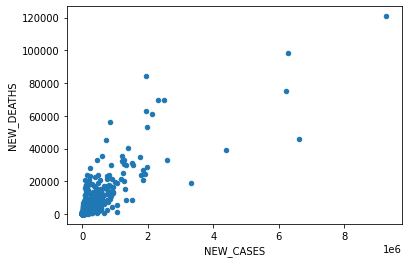

In [ ]:
df_new_set.plot(kind = 'scatter', x = 'NEW_CASES', y = 'NEW_DEATHS')
plt.show()

In [ ]:
df_new_set['NEW_CASES'].corr(df_new_set['NEW_DEATHS'])

0.8229626179297239

In [ ]:
df_new_set.to_csv("Covid_shortlisted")

We used PowerBI for the visualization of the data that we extracted in "Covid_shortlisted.csv" file. Below is the image of the report that we created.

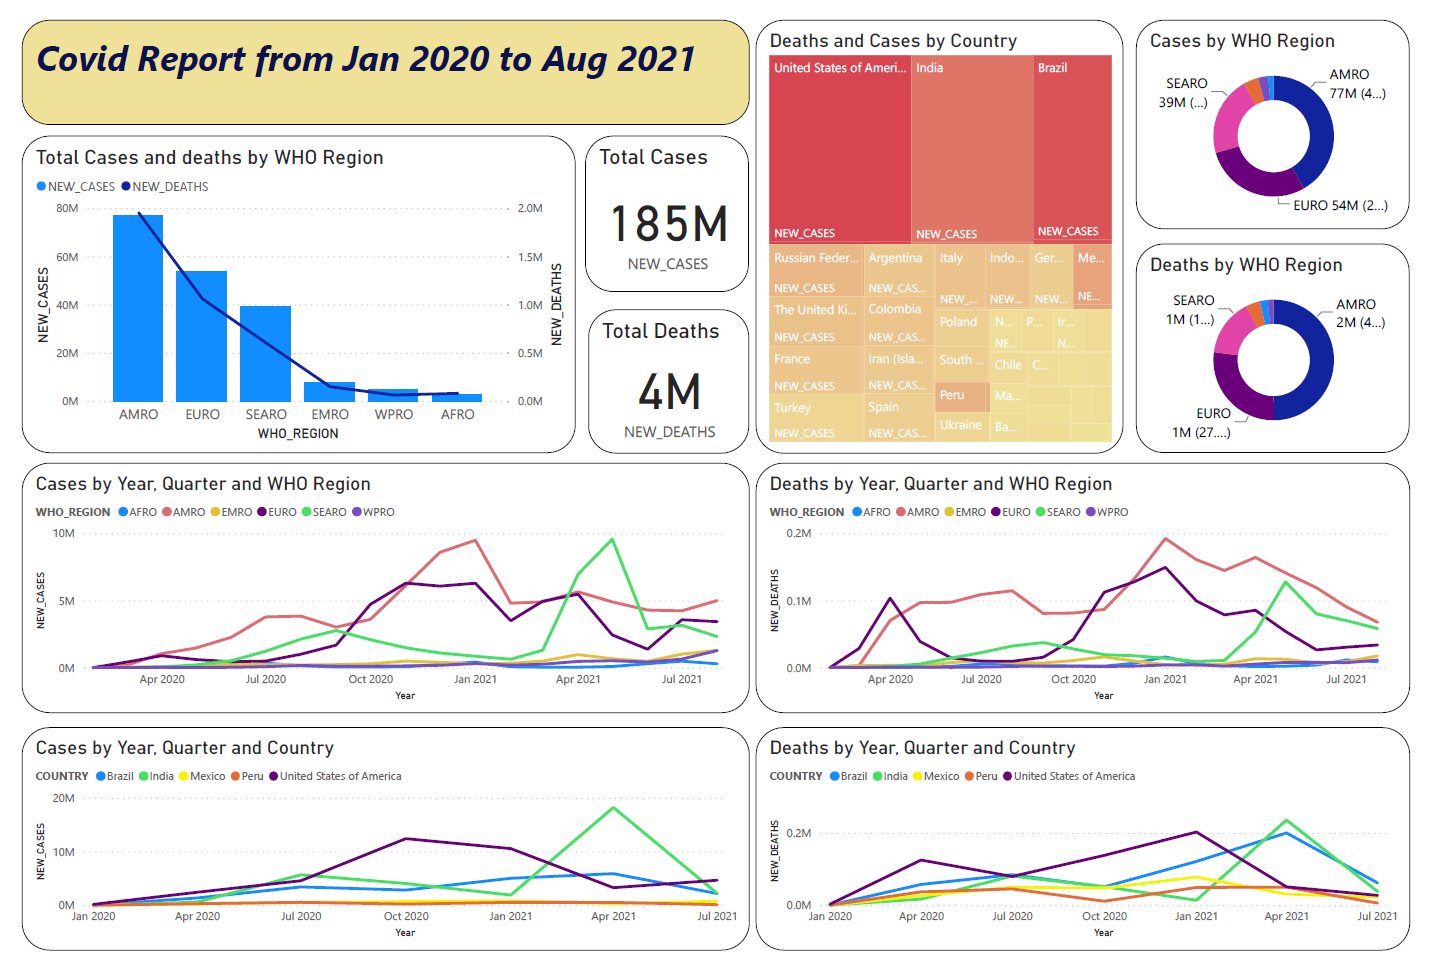